In [2]:
import pathlib
import pickle
import time
import warnings

import attr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm.notebook
from joblib import Parallel, delayed
from sklearn.metrics import auc, precision_score, recall_score, roc_curve
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.neighbors import NearestNeighbors

from skrough.base import Bireduct

# from skrough.bireducts.greedy_heuristic_bireduct import GreedyHeuristicBireduct
from skrough.bireducts.dynamically_adapted_approximate_bireduct import (
    DynamicallyAdaptedApproximateBireduct,
)

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

import config

In [2]:
DATA_DIR = pathlib.Path(config.DATA_DIR)
TMP_DIR = pathlib.Path(config.TMP_DIR)
N_JOBS = 7
SEP = ";"

K_NEIGHBORS_PROCESSES = 40
N_BIREDUCTS = 100
BIREDUCT_ALLOWED_RANDOMNESS = 0.1
BIREDUCT_CANDIDATE_N_ATTRS = 20

# FILEPATH_IN = DATA_DIR / 'toolbox_tabular_data_annonymized_discretized_uniform.csv'
# FILEPATH_IN = DATA_DIR / 'toolbox_tabular_data_annonymized_discretized_quantile.csv'
FILEPATH_IN = DATA_DIR / "toolbox_tabular_data_annonymized_discretized_kmeans.csv"
EMBEDDINGS_FILEPATH_IN = DATA_DIR / "process_embeddings_d50.csv"
FILENAME_OUT_TEMPLATE = "daab_leave_one_process_out_k_{k}_bireducts_{n_bireducts}_candidate_attrs_{candidate_n_attrs}_allowed_randomness_{allowed_randomness}_annonymized_discretized_kmeans.csv"
FILENAME_2_OUT_TEMPLATE = "daab_leave_one_process_out_same_category_bireducts_{n_bireducts}_candidate_attrs_{candidate_n_attrs}_allowed_randomness_{allowed_randomness}_annonymized_discretized_kmeans.csv"

In [4]:
df = pd.read_csv(FILEPATH_IN, sep=SEP)
process_ids = df.pop("process_ids")
df = df.astype("category")
df = df.apply(lambda x: x.cat.codes)
df_dec = df.pop("target")

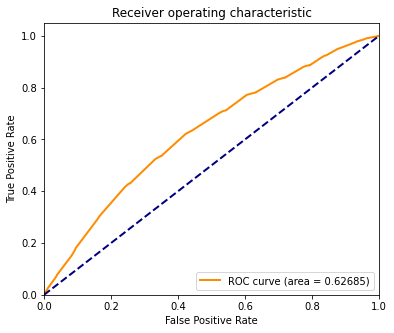

In [5]:
# x=pd.read_csv('./tmp/leave_one_process_out_k_10_m_1000_n_20.csv', sep=';')
# x=pd.read_csv('./tmp/leave_one_process_out_k_10_nb_100_bna_10_draw_objects_mk2.csv', sep=';')
# x=pd.read_csv('./tmp/leave_one_process_out_k_40_bireducts_1000_sample_attrs_100_max_attrs_10.csv', sep=';')
# x=pd.read_csv('./tmp/leave_one_process_out_same_category_bireducts_1_sample_attrs_100_max_attrs_100.csv', sep=';')
# x=pd.read_csv('./tmp/leave_one_process_out_same_category_bireducts_1000_sample_attrs_100_max_attrs_20.csv', sep=';')
# x=pd.read_csv('./tmp/leave_one_process_out_same_category_bireducts_1000_sample_attrs_200_max_attrs_30.csv', sep=';')
# x=pd.read_csv('./tmp/leave_one_process_out_k_40_bireducts_1000_candidate_attrs_50_max_attrs_30_eps_0.2_annonymized_discretized_kmeans.csv', sep=';')
x = pd.read_csv(
    "./tmp/daab_leave_one_process_out_k_40_bireducts_100_candidate_attrs_20_allowed_randomness_0.1_annonymized_discretized_kmeans.csv",
    sep=";",
)

# fpr, tpr, _ = roc_curve(df_dec, np.nan_to_num(x[0]/x[1]))
fpr, tpr, _ = roc_curve(df_dec, np.nan_to_num(x.iloc[:, 0] / x.iloc[:, 1]), pos_label=1)

plt.figure(figsize=(6, 5))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.5f)" % auc(fpr, tpr),
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()